In [1]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X=np.genfromtxt('../../neptune/input.txt')
Y=np.genfromtxt('../../neptune/output.txt').reshape(-1,1)
z=np.genfromtxt('../../neptune/test_in.txt')
Yz=np.genfromtxt('../../neptune/test_out.txt')

In [32]:
X=np.genfromtxt('./input.txt')
Y=np.genfromtxt('./output.txt').reshape(-1,1)
z=np.genfromtxt('./test_in.txt')
Yz=np.genfromtxt('./test_out.txt')

In [33]:
ker1=kernel(length=np.array([1,1,1]),scale=1,nugget=1e-6,name='sexp')
#ker2=kernel(length=np.array([1,1]),scale=1,nugget=1e-6,name='sexp',connect=1)
ker3=kernel(length=np.array([1,1]),scale=1,nugget=1e-6,name='sexp',scale_est=1,connect=1)
ker_all=combine(ker1,ker3)
m=dgp(X,Y,ker_all)

In [24]:
%load_ext line_profiler

In [26]:
from elliptical_slice import ess

In [27]:
def my_func():
    re=m.train(N=100,sub_burn=20,method='L-BFGS-B')
%lprun -f ess.one_sample my_func()

Timer unit: 1e-06 s

Total time: 16.602 s
File: /Users/deyu/Documents/GitHub/DGP/elliptical_slice.py
Function: one_sample at line 49

Line #      Hits         Time  Per Hit   % Time  Line Contents
    49                                               def one_sample(self,x,y,f,k1,k2):
    50      2000      17117.0      8.6      0.1          mean=np.zeros(len(y))
    51      2000      21412.0     10.7      0.1          f=f.flatten()
    52      2000      28671.0     14.3      0.2          y=y.flatten()
    53                                                   
    54      2000     393993.0    197.0      2.4          covariance=k_one_matrix(x,k1.length,k1.nugget,k1.name)
    55                                                   # Choose the ellipse for this sampling iteration.
    56                                                   #nu = multivariate_normal(np.zeros(mean.shape), covariance)
    57      2000     234182.0    117.1      1.4          nu = mvn(covariance,k1.scale,k1.mean_prior,k

In [45]:
m.train(N=400,sub_burn=10,method='L-BFGS-B')

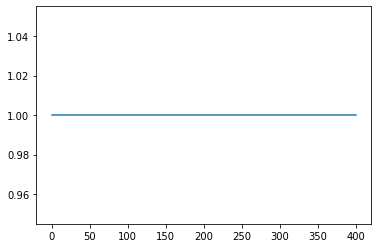

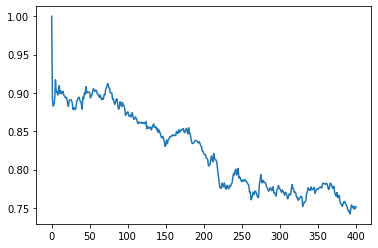

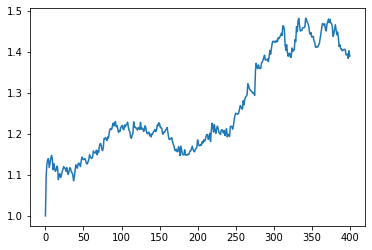

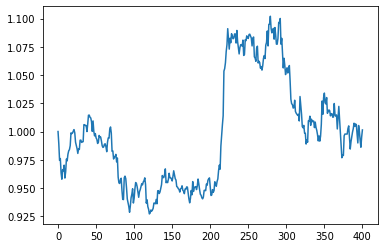

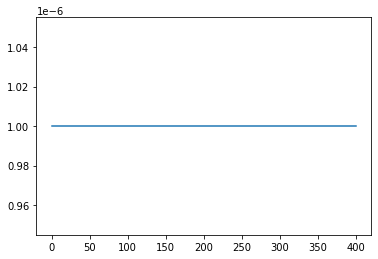

In [35]:
m.plot(0)

In [46]:
m.update_final_kernel(750)

In [47]:
mu,var=m.predict(z, N=30, burnin=0,method='mean_var')

se = 0.0007999248418220273


0.0321720838666485

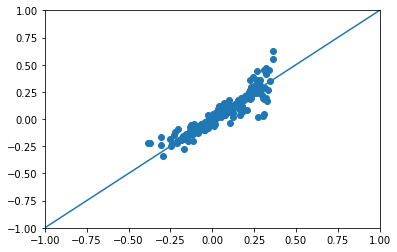

In [48]:
plt.scatter(mu,Yz)
plt.xlim((-1, 1)) 
plt.ylim((-1, 1)) 
plt.plot( [-1,1],[-1,1] )
np.sqrt(np.mean((mu-Yz)**2))/(np.max(Yz)-np.min(Yz))

In [49]:
np.sqrt(np.mean((mu-Yz)**2))

0.03118391983824054

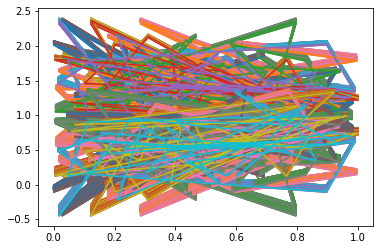

In [11]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[0][i],m.samples[1][i])

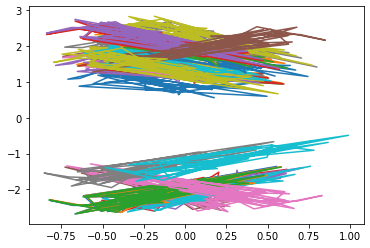

In [29]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[1][i],m.samples[2][i])